# Project - Decision Trees

In [1]:
# Imports:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [2]:
# 1) Load the training and validation CSV files into four separate Pandas objects to hold labels and features for training, 
# and labels and features for validation.
train = pd.read_csv('Training.csv')
val = pd.read_csv('Validation.csv')

train_label = np.array(train['Condition'])
train_features = np.array(train.drop('Condition', axis=1))

val_label = np.array(val['Condition'])
val_features = np.array(val.drop('Condition', axis=1))

In [3]:
# 2) Train a decision tree model using default hyperparameters. Display the tree depth using the ‘get_depth()’ method.

model = DecisionTreeClassifier()
model.fit(train_features, train_label)

print('Tree Depth:', model.get_depth())

Tree Depth: 50


   Values  Training Metrics  Validation Metrics
0       1          0.648371            0.642275
1       2          0.648371            0.642275
2       3          0.690091            0.684700
3       4          0.725773            0.725742
4       5          0.689449            0.684493


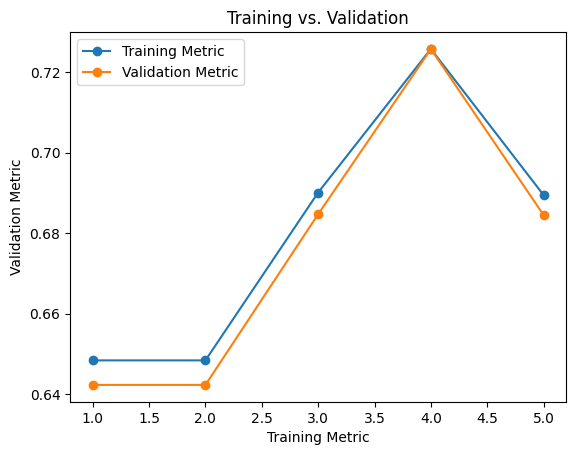

In [4]:
# 3) Experiment with the ‘max_depth’ hyperparameter.
# · The above model is very likely overfitting. Choose five different max_depth values to try, lower than the depth of the model found above. 
#   Place these in a list called ‘md_list’.
# · Choose a metric (e.g. accuracy, precision, 𝐹1 score, etc.) to evaluate model performance.
# · Create empty lists named similarly to ‘train_md_metric’ and ‘val_md_metric’ to hold values of the metric.
# · For i in md_list:
#     · Train a model using max_depth=i.
#     · Find predictions on the training and validation sets.
#     · Calculate the chosen metric on training and validation sets. Append the values to their lists.
# · Create and display a dataframe with md_list, train_md_metric, and val_md_metric as columns. Label the columns.
# · Plot the training and validation metric for each model. Revisit the loop if you need to try other values of max_depth to obtain a model that does not overfit. 
# Add a markdown cell to justify a best choice of max_depth.

md_list = [1, 2, 3, 4, 5]
train_md_metric = []
val_md_metric = []

for i in md_list:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(train_features, train_label)
    
    preds_train = model.predict(train_features)
    preds_val = model.predict(val_features)
    
    train_md_metric.append(fbeta_score(train_label, preds_train, beta=2))
    val_md_metric.append(fbeta_score(val_label, preds_val, beta=2))

df_md = pd.DataFrame({
    'Values': md_list,
    'Training Metrics': train_md_metric,
    'Validation Metrics': val_md_metric
})
print(df_md)


plt.plot(md_list, df_md['Training Metrics'], label='Training Metric', marker='o')
plt.plot(md_list, df_md['Validation Metrics'], label='Validation Metric', marker='o')
plt.xlabel('Training Metric')
plt.ylabel('Validation Metric')
plt.title('Training vs. Validation')
plt.legend()
plt.show()

**Explanation:**

I tried experimenting with different values as seen below this explanation, but I found that the best one was when the max_depth equals 4. I think this is best as the values reach near perfect sync with each other. In other words, these values are perfect to the ten thousandth position (the fourth digit in the decimal.
Here are the values I tried experimenting with, and the training and validation metrics that I received as outputs:

**Values 25-45 (incrementing by 5):**
<pre>
   Values  Training Metrics  Validation Metrics
0      25          0.939285            0.645146
1      30          0.978253            0.636093
2      35          0.994299            0.635317
3      40          0.999093            0.634226
4      45          0.999878            0.634245
</pre>

**Values 5-25 (incrementing by 5):**
<pre>
   Values  Training Metrics  Validation Metrics
0       5          0.689449            0.684493
1      10          0.719220            0.679010
2      15          0.790332            0.674886
3      20          0.877241            0.653191
4      25          0.938607            0.646759
</pre>

**Values 1-5:**
<pre>
   Values  Training Metrics  Validation Metrics
0       1          0.648371            0.642275
1       2          0.648371            0.642275
2       3          0.690091            0.684700
3       4          0.725773            0.725742
4       5          0.689449            0.684493
</pre>

After reviewing these results and the visual provided alongside it, the metrics where the values is 4 appear to be the best choice for max_depth.

In [5]:
# Here is the markdown again:

# Explanation:

# I tried experimenting with different values as seen below this explanation, but I found that the best one was when the max_depth equals 4. 
# I think this is best as the values reach near perfect sync with each other. In other words, these values are perfect to the ten thousandth 
# position (the fourth digit in the decimal. Here are the values I tried experimenting with, and the training and validation metrics that I received as outputs:

# Values 25-45 (incrementing by 5):

#    Values  Training Metrics  Validation Metrics
# 0      25          0.939285            0.645146
# 1      30          0.978253            0.636093
# 2      35          0.994299            0.635317
# 3      40          0.999093            0.634226
# 4      45          0.999878            0.634245
# Values 5-25 (incrementing by 5):

#    Values  Training Metrics  Validation Metrics
# 0       5          0.689449            0.684493
# 1      10          0.719220            0.679010
# 2      15          0.790332            0.674886
# 3      20          0.877241            0.653191
# 4      25          0.938607            0.646759
# Values 1-5:

#    Values  Training Metrics  Validation Metrics
# 0       1          0.648371            0.642275
# 1       2          0.648371            0.642275
# 2       3          0.690091            0.684700
# 3       4          0.725773            0.725742
# 4       5          0.689449            0.684493
# After reviewing these results and the visual provided alongside it, the metrics where the values is 4 appear to be the best choice for max_depth.

   Values  Training Metrics  Validation Metrics
0     525          0.704824            0.699261
1    1050          0.682818            0.677433
2    2100          0.668745            0.667140
3    4200          0.727245            0.726562
4    8400          0.648371            0.642275


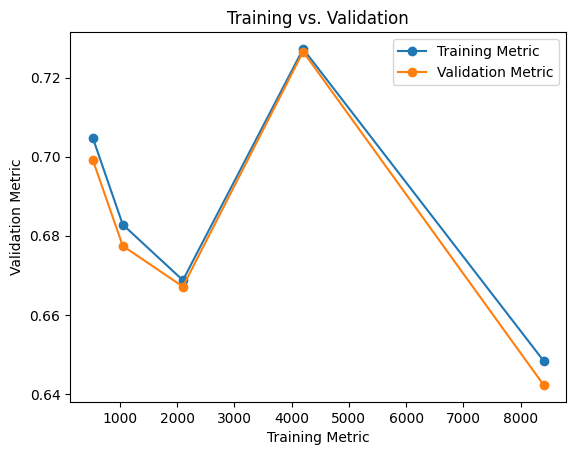

In [6]:
# 4) Experiment with the min_samples_leaf hyperparameter.
# · Choose at least five different min_samples_leaf values to try, starting with a low number (less than 1% of the data length) 
#   and increasing by factors of 2. Place these in a list called ‘msl_list’.
# · Choose the same metric used above. Create empty lists named similarly to ‘train_msl_metric’ and ‘val_msl_metric’ to hold values of the metric.
# · For i in msl_list:
#     · Train a model using min_samples_leaf=i (with all other hyperparameters set to default values).
#     · Find predictions on the training and validation sets.
#     · Calculate the chosen metric on training and validation sets. Append the values to their lists.
# · Create and display a dataframe with msl_list, train_msl_metric, and val_msl_metric as columns. Label the columns.
# · Plot the training and validation metric for each model. Revisit the loop if you need to try other values of min_samples_leaf. 
#   Add a markdown cell to justify a choice of min_samples_leaf.

#Lowest value -> 525
msl_list = [525, 1050, 2100, 4200, 8400]
train_msl_metric = []
val_msl_metric = []

for i in msl_list:
    model = DecisionTreeClassifier(min_samples_leaf=i)
    model.fit(train_features, train_label)
    
    preds_train = model.predict(train_features)
    preds_val = model.predict(val_features)
    
    train_msl_metric.append(fbeta_score(train_label, preds_train, beta=2))
    val_msl_metric.append(fbeta_score(val_label, preds_val, beta=2))

df_msl = pd.DataFrame({
    'Values': msl_list,
    'Training Metrics': train_msl_metric,
    'Validation Metrics': val_msl_metric
})
print(df_msl)


plt.plot(msl_list, df_msl['Training Metrics'], label='Training Metric', marker='o')
plt.plot(msl_list, df_msl['Validation Metrics'], label='Validation Metric', marker='o')
plt.xlabel('Training Metric')
plt.ylabel('Validation Metric')
plt.title('Training vs. Validation')
plt.legend()
plt.show()

**Explanation:**

I believe the best choice for the min_samples_leaf is the value of 4200. The training and validation metrics for this value are near perfect, and as such, I do not believe that there is a need to review other values.
The DataFrame outputed below includes the only values used:

**Values [525, 1050, 2100, 4200, 8400]:**
<pre>
   Values  Training Metrics  Validation Metrics
0     525          0.704824            0.699261
1    1050          0.682818            0.677433
2    2100          0.668745            0.667140
3    4200          0.727245            0.726562
4    8400          0.648371            0.642275
</pre>

In [7]:
# Here is the markdown again:

# Explanation:

# I believe the best choice for the min_samples_leaf is the value of 4200. The training and validation metrics for this value are near perfect, 
# and as such, I do not believe that there is a need to review other values. The DataFrame outputed below includes the only values used:

# Values [525, 1050, 2100, 4200, 8400]:

#    Values  Training Metrics  Validation Metrics
# 0     525          0.704824            0.699261
# 1    1050          0.682818            0.677433
# 2    2100          0.668745            0.667140
# 3    4200          0.727245            0.726562
# 4    8400          0.648371            0.642275

    Values  Training Metrics  Validation Metrics
0  0.10000          0.000000            0.000000
1  0.01000          0.648371            0.642275
2  0.00100          0.731166            0.731159
3  0.00010          0.693366            0.688121
4  0.00001          0.983989            0.646066


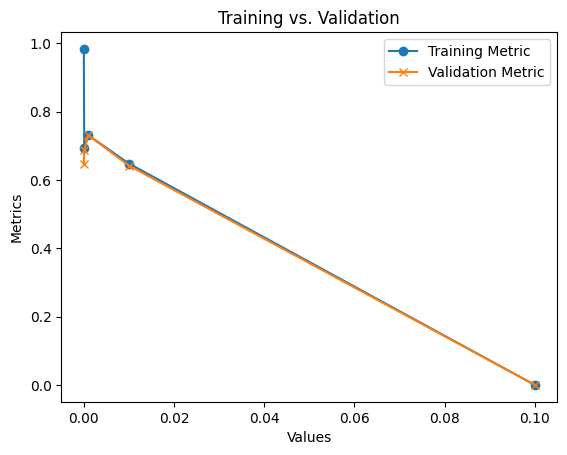

In [8]:
# 5) Experiment with the min_impurity_decrease hyperparameter.
# · Choose at least five different min_impurity_decrease values to try, starting with 0.1 and decreasing by a factor of 
#   10 each time. Place these in a list called ‘mid_list’.
# · Choose the same metric used above. Create empty lists named similarly to ‘train_mid_metric’ and ‘val_mid_metric’ to hold values of the metric.
# · For i in mid_list:
#     · Train a model using min_impurity_decrease=i (with all other hyperparameters set to default values).
#     · Find predictions on the training and validation sets.
#     · Calculate the chosen metric on training and validation sets. Append the values to their lists.
# · Create and display a dataframe with mid_list, train_mid_metric, and val_mid_metric as columns. Label the columns.
# · Plot the training and validation metric for each model. Revisit the loop if you need to try other values of min_impurity_decrease. 
#   Add a markdown cell to justify a choice of min_impurity_decrease.

mid_list = [0.1, 0.01, 0.001, 0.0001, 0.00001]
train_mid_metric = []
val_mid_metric = []

for i in mid_list:
    model = DecisionTreeClassifier(min_impurity_decrease=i)
    model.fit(train_features, train_label)
    
    preds_train = model.predict(train_features)
    preds_val = model.predict(val_features)
    
    train_mid_metric.append(fbeta_score(train_label, preds_train, beta=2))
    val_mid_metric.append(fbeta_score(val_label, preds_val, beta=2))

df_mid = pd.DataFrame({
    'Values': mid_list,
    'Training Metrics': train_mid_metric,
    'Validation Metrics': val_mid_metric
})
print(df_mid)


plt.plot(mid_list, df_mid['Training Metrics'], label='Training Metric', marker='o')
plt.plot(mid_list, df_mid['Validation Metrics'], label='Validation Metric', marker='x')
plt.xlabel('Values')
plt.ylabel('Metrics')
plt.title('Training vs. Validation')
plt.legend()
plt.show()

**Explanation:**

There are a couple of key observations about the metrics produced by these values. Here are some of the details I noticed:

1. Most of the metrics produced are nearly perfect except of the value of 0.0001
2. The metrics for the value of 0.1 are at 0.0. While this appears perfectly aligned, it is odd, and I believe that the model is not learning and improving with this value.

After reviewing these discrepancies, I reviewed the rest of the metrics and found that the metrics for the value 0.001 are best because the metrics appear nearly aligned.

The DataFrame output is below:

**Values [0.1, 0.01, 0.001, 0.0001, 0.00001]:**
<pre>
    Values  Training Metrics  Validation Metrics
0  0.10000          0.000000            0.000000
1  0.01000          0.648371            0.642275
2  0.00100          0.731166            0.731159
3  0.00010          0.693366            0.688121
4  0.00001          0.983928            0.641808
</pre>

In [9]:
# Here is the markdown again:

# Explanation:

# There are a couple of key observations about the metrics produced by these values. Here are some of the details I noticed:

# 1. Most of the metrics produced are nearly perfect except of the value of 0.0001
# 2. The metrics for the value of 0.1 are at 0.0. While this appears perfectly aligned, it is odd, and I believe that the model is not learning and improving with this value.

# After reviewing these discrepancies, I reviewed the rest of the metrics and found that the metrics for the value 0.001 are best because the metrics appear nearly aligned.

# The DataFrame output is below:

# Values [0.1, 0.01, 0.001, 0.0001, 0.00001]:

#     Values  Training Metrics  Validation Metrics
# 0  0.10000          0.000000            0.000000
# 1  0.01000          0.648371            0.642275
# 2  0.00100          0.731166            0.731159
# 3  0.00010          0.693366            0.688121
# 4  0.00001          0.983928            0.641808

Training Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71     26266
           1       0.71      0.73      0.72     26234

    accuracy                           0.72     52500
   macro avg       0.72      0.72      0.72     52500
weighted avg       0.72      0.72      0.72     52500

Training F2-Score:  0.727245180106814
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      6598
           1       0.71      0.73      0.72      6527

    accuracy                           0.72     13125
   macro avg       0.72      0.72      0.72     13125
weighted avg       0.72      0.72      0.72     13125

Validation F2-Score:  0.726562024700371
Training Confusion Matrix:
[[18397  7869]
 [ 7034 19200]]
Validation Confusion Matrix:
[[4609 1989]
 [1750 4777]]


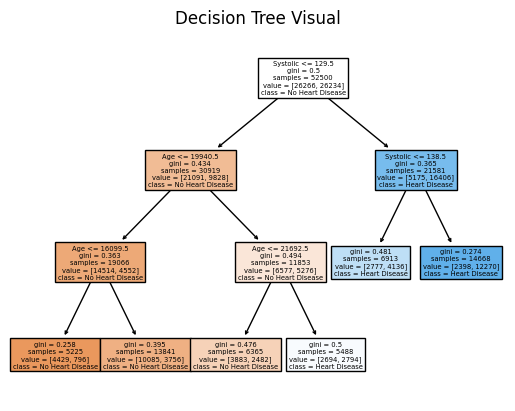

In [10]:
# 6) Train a model using the values you found above for max_depth, min_samples_leaf, and min_impurity_decrease. 
# Find predictions for both the training and validation sets. Then for both training and validation:
# · Use the classification_report and other functions in sklearn to display the metrics you decided upon in the project step ‘data analysis and preparation.’
# · Use the confusion_matrix function in sklearn to display the confusion matrix.
# · Use the display_tree method in utils.py (from chapter 9) to display the tree, or use the sklearn function plot_tree().

model = DecisionTreeClassifier(max_depth=4,
                               min_samples_leaf=4200,
                               min_impurity_decrease=0.001)
model.fit(train_features, train_label)

train_pred = model.predict(train_features)
val_pred = model.predict(val_features)

train_class_report = classification_report(train_label, train_pred)
val_class_report = classification_report(val_label, val_pred)

# Need to calculate F2-score separately
train_f2 = fbeta_score(train_label, train_pred, beta=2)
val_f2 = fbeta_score(val_label, val_pred, beta=2)

print('Training Classification Report:')
print(train_class_report)
print('Training F2-Score: ', train_f2)
print('Validation Classification Report:')
print(val_class_report)
print('Validation F2-Score: ', val_f2)

train_matrix = confusion_matrix(train_label, train_pred)
val_matrix = confusion_matrix(val_label, val_pred)

print('Training Confusion Matrix:')
print(train_matrix)
print('Validation Confusion Matrix:')
print(val_matrix)


# Display the tree - using plot_tree sklearn function, and plot visualization functions
feature_names = train.drop('Condition', axis=1).columns.tolist()     # np.array has no attribute columns - create variable with column names manually
# PlotTree: model, filled (according to class), features name = column names, class names = labels for each class
plot_tree(model, filled=True, feature_names = feature_names, class_names=['No Heart Disease', 'Heart Disease'])
plt.title('Decision Tree Visual')
plt.show()

In [11]:
# 7) Add a markdown cell to discuss how well the model in step 6 performs. Observe any problems that need to be addressed, such as too many 
# false positives or false negatives for a particular class, low metrics (underfitting) across both training and validation, overfitting, etc.

**Explanation:**

I would say that this model is performing fairly well, although there is room for improvement. Just from a first glance at the decision tree, the Gini index appears to be 0.5 or below for all leaves/nodes. While this is a good value, the Gini index could always be improved by moving closer to 0 rather than staying around the 0.5 mark.


Next, the classification reports tell a different story. For both sets, we get the following identical results: accuracy appears at 0.72, F2-Score at 0.73 (F1-Score was printed by default, but I chose to focus on F2 in the beginning of this project), and recall at 0.7 for the negative class and 0.73 for the positive class. These results are quite good for this model, as it performs slightly better when identifying cases of heart disease in the recall results. The F2-Score also indicates that this model prioritizes recall over precision, which is important in this use case because identifying heart disease (the positive class) is crucial for medical predictions.


Lastly, we have the confusion matrices. As before, both training and validation show very similar results. While there is an extremely high number of correctly identified positive values, the falsely identified values are also quite high. Although the number of false negatives is lower than the number of false positives (false negatives being the worse outcome, as patients with heart disease would be falsely identified as well), the high percentage of those identified is somewhat concerning. 


In conclusion, the model does perform reasonably well overall, but I believe there is still a lot of room for improvement.